<a href="https://colab.research.google.com/github/Ruran8wa/kigali-flow-model/blob/main/kigali_flow_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, f1_score, precision_score, recall_score
import joblib
import tensorflow as tf
from tensorflow.keras import models, layers, regularizers, callbacks, optimizers
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [10]:
df = pd.read_csv("kigali_traffic_dataset.csv")
print(df.head())
print(df.info())
print(df['congestion_level'].value_counts())

  time_of_day weather       road_type  event congestion_level
0     morning    rain       main road      1             High
1     evening    rain     residential      1         Moderate
2   afternoon   foggy  secondary road      0              Low
3     evening  cloudy  secondary road      1         Moderate
4     evening   clear     residential      0             High
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   time_of_day       1000 non-null   object
 1   weather           1000 non-null   object
 2   road_type         1000 non-null   object
 3   event             1000 non-null   int64 
 4   congestion_level  1000 non-null   object
dtypes: int64(1), object(4)
memory usage: 39.2+ KB
None
congestion_level
Moderate    380
Low         333
High        287
Name: count, dtype: int64


In [11]:
df_encoded = df.copy()

for col in ['time_of_day', 'weather', 'road_type']:
    df_encoded[col] = LabelEncoder().fit_transform(df_encoded[col])

df_encoded['congestion_level'] = LabelEncoder().fit_transform(df_encoded['congestion_level'])

In [12]:
X = df_encoded.drop('congestion_level', axis=1)
y = df_encoded['congestion_level']

In [13]:
X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size=0.15, random_state=42)

X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.176, random_state=42)  # ~15% of remaining


Logistic Regression Model

In [14]:
logreg = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=1000)

logreg.fit(X_train, y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


LogisticRegression(max_iter=1000, multi_class='multinomial')

In [15]:
y_pred = logreg.predict(X_val)

print("Accuracy:", accuracy_score(y_val, y_pred))
print("Precision:", precision_score(y_val, y_pred, average='weighted'))
print("Recall:", recall_score(y_val, y_pred, average='weighted'))
print("F1 Score:", f1_score(y_val, y_pred, average='weighted'))

print("\nClassification Report:")
print(classification_report(y_val, y_pred, target_names=['Low', 'Moderate', 'High']))

Accuracy: 0.74
Precision: 0.7480600353820693
Recall: 0.74
F1 Score: 0.7427352521692144

Classification Report:
              precision    recall  f1-score   support

         Low       0.89      0.78      0.83        41
    Moderate       0.62      0.67      0.64        51
        High       0.76      0.78      0.77        58

    accuracy                           0.74       150
   macro avg       0.76      0.74      0.75       150
weighted avg       0.75      0.74      0.74       150



In [16]:
joblib.dump(logreg, "saved_models/model-1.pkl")

['saved_models/model-1.pkl']

Basic Neural Network

In [17]:
model_basic = models.Sequential([
    layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    layers.Dense(32, activation='relu'),
    layers.Dense(3, activation='softmax')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [18]:
model_basic.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [19]:
history_basic = model_basic.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=30,
    verbose=1
)

Epoch 1/30
22/22 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - accuracy: 0.4172 - loss: 1.0811 - val_accuracy: 0.6000 - val_loss: 0.9996
Epoch 2/30
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5619 - loss: 0.9877 - val_accuracy: 0.6200 - val_loss: 0.9140
Epoch 3/30
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5994 - loss: 0.8960 - val_accuracy: 0.6333 - val_loss: 0.8295
Epoch 4/30
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6357 - loss: 0.8058 - val_accuracy: 0.7333 - val_loss: 0.7663
Epoch 5/30
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7000 - loss: 0.7644 - val_accuracy: 0.7200 - val_loss: 0.7146
Epoch 6/30
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7017 - loss: 0.7352 - val_accuracy: 0.7400 - val_loss: 0.6741
Epoch 7/30
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6985 - loss: 0.6764 - val_accuracy: 0.7467 - val_loss: 0.6376
Epoch 8/30
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7177 - loss: 0.6403 - val_accuracy: 0.7600 - val_loss

In [20]:
y_pred_probs = model_basic.predict(X_val)
y_pred = np.argmax(y_pred_probs, axis=1)

print("Accuracy:", accuracy_score(y_val, y_pred))
print("Precision:", precision_score(y_val, y_pred, average='weighted'))
print("Recall:", recall_score(y_val, y_pred, average='weighted'))
print("F1 Score:", f1_score(y_val, y_pred, average='weighted'))

print("\nClassification Report:")
print(classification_report(y_val, y_pred, target_names=['Low', 'Moderate', 'High']))

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
Accuracy: 0.8733333333333333
Precision: 0.8740246913580246
Recall: 0.8733333333333333
F1 Score: 0.8727408637873756

Classification Report:
              precision    recall  f1-score   support

         Low       0.84      0.93      0.88        41
    Moderate       0.90      0.90      0.90        51
        High       0.87      0.81      0.84        58

    accuracy                           0.87       150
   macro avg       0.87      0.88      0.87       150
weighted avg       0.87      0.87      0.87       150



In [21]:
model_basic.save("saved_models/model-2.keras")

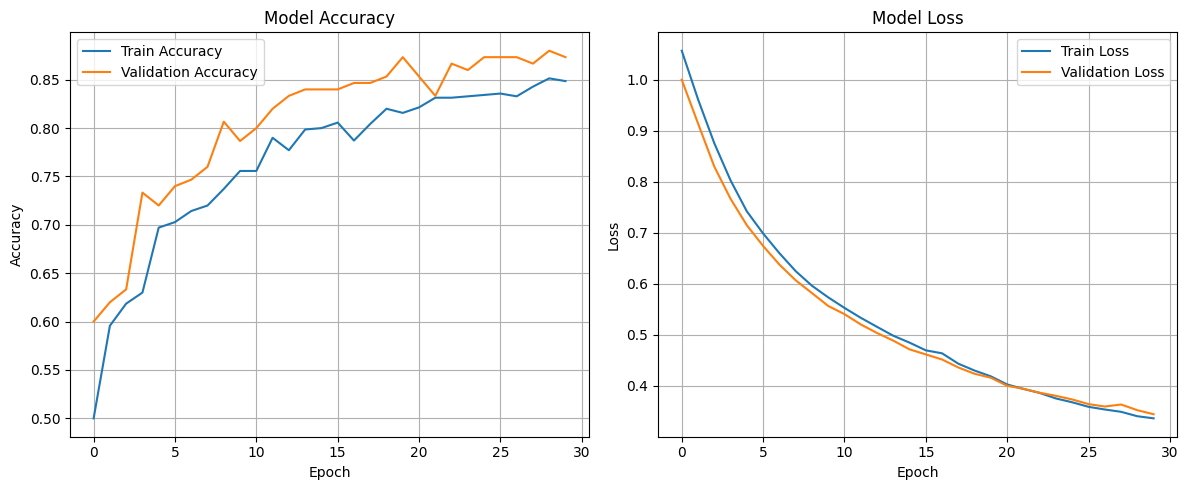

In [22]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history_basic.history['accuracy'], label='Train Accuracy')
plt.plot(history_basic.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(history_basic.history['loss'], label='Train Loss')
plt.plot(history_basic.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

Neural Network with Optimizations

In [23]:
model_opt1 = models.Sequential([
    layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],),
                 kernel_regularizer=regularizers.l1(0.001)),
    layers.Dropout(0.3),
    layers.Dense(32, activation='relu', kernel_regularizer=regularizers.l1(0.001)),
    layers.Dropout(0.3),
    layers.Dense(3, activation='softmax')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [24]:
optimizer = optimizers.RMSprop(learning_rate=0.001)

model_opt1.compile(
    optimizer=optimizer,
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [25]:
early_stop = callbacks.EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True
)

In [26]:
history_opt1 = model_opt1.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=50,
    callbacks=[early_stop],
    verbose=1
)

Epoch 1/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.2852 - loss: 1.4643 - val_accuracy: 0.4267 - val_loss: 1.3105
Epoch 2/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.4379 - loss: 1.3235 - val_accuracy: 0.5867 - val_loss: 1.2204
Epoch 3/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.4922 - loss: 1.2425 - val_accuracy: 0.6467 - val_loss: 1.1390
Epoch 4/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5539 - loss: 1.1857 - val_accuracy: 0.6600 - val_loss: 1.0739
Epoch 5/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5792 - loss: 1.1280 - val_accuracy: 0.6267 - val_loss: 1.0172
Epoch 6/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5998 - loss: 1.0833 - val_accuracy: 0.6867 - val_loss: 0.9740
Epoch 7/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6096 - loss: 1.0677 - val_accuracy: 0.7467 - val_loss: 0.9313
Epoch 8/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6565 - loss: 1.0053 - val_accuracy: 0.7600 - val_loss

In [27]:
y_pred_probs = model_opt1.predict(X_val)
y_pred = np.argmax(y_pred_probs, axis=1)

print("Accuracy:", accuracy_score(y_val, y_pred))
print("Precision:", precision_score(y_val, y_pred, average='weighted'))
print("Recall:", recall_score(y_val, y_pred, average='weighted'))
print("F1 Score:", f1_score(y_val, y_pred, average='weighted'))

print("\nClassification Report:")
print(classification_report(y_val, y_pred, target_names=['Low', 'Moderate', 'High']))

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
Accuracy: 0.8266666666666667
Precision: 0.8373195108984584
Recall: 0.8266666666666667
F1 Score: 0.8282670806399619

Classification Report:
              precision    recall  f1-score   support

         Low       0.97      0.78      0.86        41
    Moderate       0.75      0.84      0.80        51
        High       0.82      0.84      0.83        58

    accuracy                           0.83       150
   macro avg       0.85      0.82      0.83       150
weighted avg       0.84      0.83      0.83       150



In [28]:
model_opt1.save("saved_models/model-3.keras")

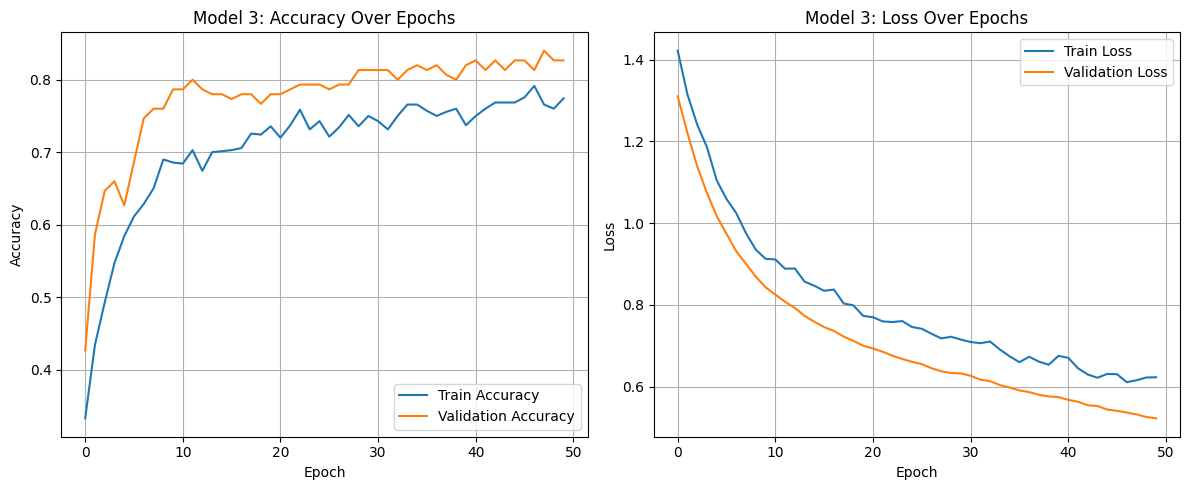

In [29]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history_opt1.history['accuracy'], label='Train Accuracy')
plt.plot(history_opt1.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model 3: Accuracy Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(history_opt1.history['loss'], label='Train Loss')
plt.plot(history_opt1.history['val_loss'], label='Validation Loss')
plt.title('Model 3: Loss Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

 Neural Network with Adam + L2 + Dropout

In [30]:
model_opt2 = models.Sequential([
    layers.Dense(128, activation='relu', input_shape=(X_train.shape[1],),
                 kernel_regularizer=regularizers.l2(0.001)),
    layers.Dropout(0.4),
    layers.Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.001)),
    layers.Dropout(0.4),
    layers.Dense(3, activation='softmax')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [31]:
optimizer = optimizers.Adam(learning_rate=0.0005)

model_opt2.compile(
    optimizer=optimizer,
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [32]:
early_stop_2 = callbacks.EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True
)

In [33]:
history_opt2 = model_opt2.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=60,
    callbacks=[early_stop_2],
    verbose=1
)

Epoch 1/60
22/22 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - accuracy: 0.3892 - loss: 1.1775 - val_accuracy: 0.5467 - val_loss: 1.0950
Epoch 2/60
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.4646 - loss: 1.1392 - val_accuracy: 0.5867 - val_loss: 1.0350
Epoch 3/60
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5370 - loss: 1.0594 - val_accuracy: 0.6533 - val_loss: 0.9839
Epoch 4/60
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5704 - loss: 1.0300 - val_accuracy: 0.6667 - val_loss: 0.9380
Epoch 5/60
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5628 - loss: 0.9893 - val_accuracy: 0.7133 - val_loss: 0.8979
Epoch 6/60
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6296 - loss: 0.9495 - val_accuracy: 0.7133 - val_loss: 0.8617
Epoch 7/60
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6009 - loss: 0.9589 - val_accuracy: 0.7467 - val_loss: 0.8319
Epoch 8/60
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6450 - loss: 0.9124 - val_accuracy: 0.7267 - val_loss

In [34]:
y_pred_probs_2 = model_opt2.predict(X_val)
y_pred_2 = np.argmax(y_pred_probs_2, axis=1)

print("Accuracy:", accuracy_score(y_val, y_pred_2))
print("Precision:", precision_score(y_val, y_pred_2, average='weighted'))
print("Recall:", recall_score(y_val, y_pred_2, average='weighted'))
print("F1 Score:", f1_score(y_val, y_pred_2, average='weighted'))

print("\nClassification Report:")
print(classification_report(y_val, y_pred_2, target_names=['Low', 'Moderate', 'High']))

1/5 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
Accuracy: 0.8533333333333334
Precision: 0.8541451247165534
Recall: 0.8533333333333334
F1 Score: 0.853529943502825

Classification Report:
              precision    recall  f1-score   support

         Low       0.88      0.88      0.88        41
    Moderate       0.88      0.84      0.86        51
        High       0.82      0.84      0.83        58

    accuracy                           0.85       150
   macro avg       0.86      0.86      0.86       150
weighted avg       0.85      0.85      0.85       150



In [35]:
model_opt2.save("saved_models/model-4.keras")

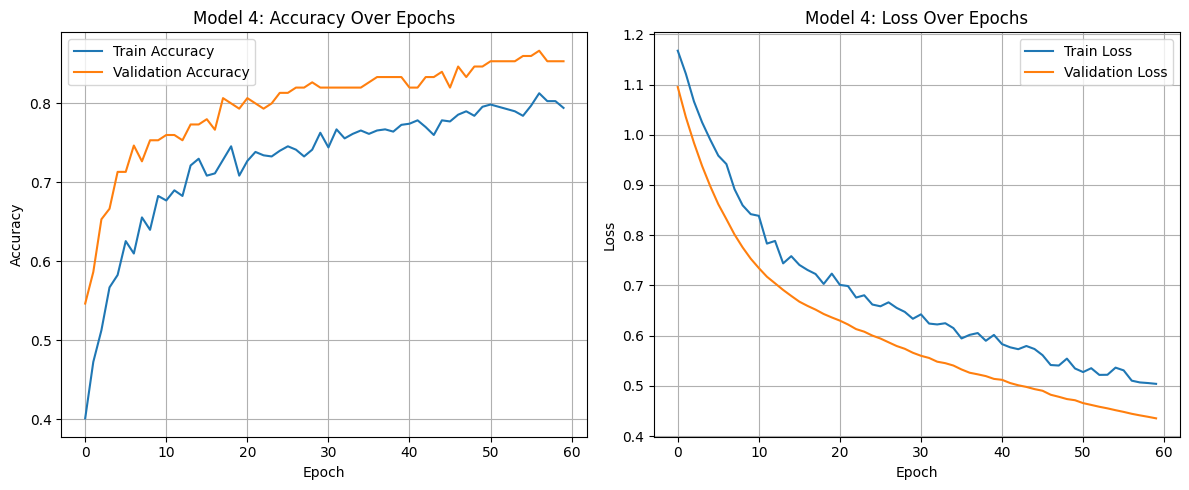

In [36]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history_opt2.history['accuracy'], label='Train Accuracy')
plt.plot(history_opt2.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model 4: Accuracy Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(history_opt2.history['loss'], label='Train Loss')
plt.plot(history_opt2.history['val_loss'], label='Validation Loss')
plt.title('Model 4: Loss Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

Model 5

In [37]:
model_opt3 = models.Sequential([
    layers.Dense(256, activation='relu', input_shape=(X_train.shape[1],),
                 kernel_regularizer=regularizers.l1_l2(l1=0.001, l2=0.001)),
    layers.Dropout(0.5),
    layers.Dense(128, activation='relu', kernel_regularizer=regularizers.l1_l2(l1=0.001, l2=0.001)),
    layers.Dropout(0.5),
    layers.Dense(3, activation='softmax')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [38]:
optimizer = optimizers.Nadam(learning_rate=0.0007)

model_opt3.compile(
    optimizer=optimizer,
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [39]:
early_stop_3 = callbacks.EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True
)

In [40]:
history_opt3 = model_opt3.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=60,
    callbacks=[early_stop_3],
    verbose=1
)

Epoch 1/60
22/22 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - accuracy: 0.3802 - loss: 3.3425 - val_accuracy: 0.5600 - val_loss: 3.0309
Epoch 2/60
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.4740 - loss: 2.9780 - val_accuracy: 0.6467 - val_loss: 2.6635
Epoch 3/60
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5600 - loss: 2.6235 - val_accuracy: 0.6867 - val_loss: 2.3393
Epoch 4/60
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5719 - loss: 2.3107 - val_accuracy: 0.6867 - val_loss: 2.0650
Epoch 5/60
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6165 - loss: 2.0535 - val_accuracy: 0.7000 - val_loss: 1.8464
Epoch 6/60
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6088 - loss: 1.8888 - val_accuracy: 0.7000 - val_loss: 1.6633
Epoch 7/60
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6578 - loss: 1.7116 - val_accuracy: 0.7267 - val_loss: 1.5172
Epoch 8/60
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6407 - loss: 1.5407 - val_accuracy: 0.7267 - val_loss

In [41]:
y_pred_probs_3 = model_opt3.predict(X_val)
y_pred_3 = np.argmax(y_pred_probs_3, axis=1)

print("Accuracy:", accuracy_score(y_val, y_pred_3))
print("Precision:", precision_score(y_val, y_pred_3, average='weighted'))
print("Recall:", recall_score(y_val, y_pred_3, average='weighted'))
print("F1 Score:", f1_score(y_val, y_pred_3, average='weighted'))

print("\nClassification Report:")
print(classification_report(y_val, y_pred_3, target_names=['Low', 'Moderate', 'High']))

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
Accuracy: 0.8133333333333334
Precision: 0.8240964483545129
Recall: 0.8133333333333334
F1 Score: 0.8151930420987026

Classification Report:
              precision    recall  f1-score   support

         Low       0.97      0.78      0.86        41
    Moderate       0.75      0.80      0.77        51
        High       0.79      0.84      0.82        58

    accuracy                           0.81       150
   macro avg       0.84      0.81      0.82       150
weighted avg       0.82      0.81      0.82       150



In [42]:
model_opt3.save("saved_models/model-5.keras")

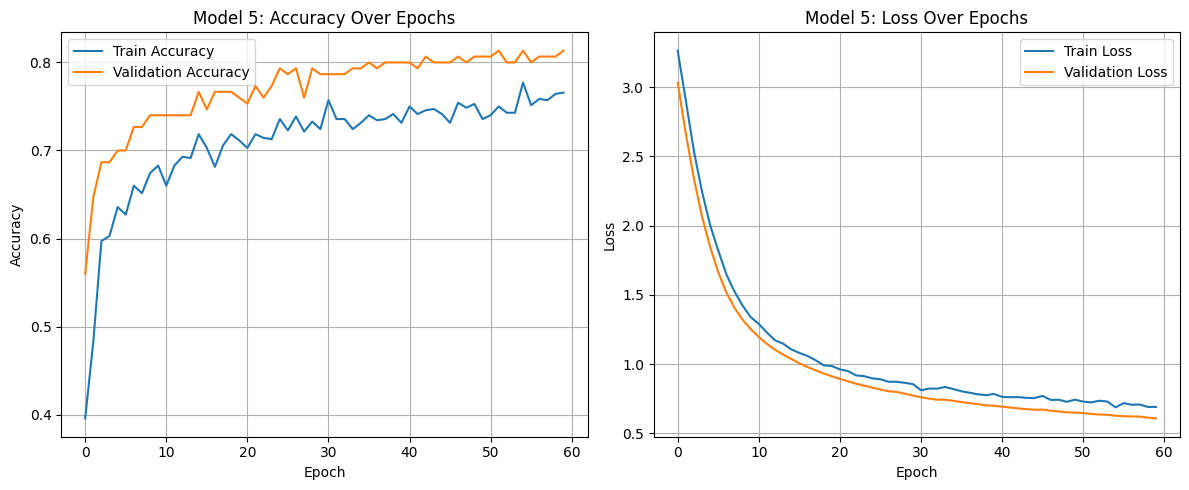

In [43]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history_opt3.history['accuracy'], label='Train Accuracy')
plt.plot(history_opt3.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model 5: Accuracy Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(history_opt3.history['loss'], label='Train Loss')
plt.plot(history_opt3.history['val_loss'], label='Validation Loss')
plt.title('Model 5: Loss Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()